In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
car_data = pd.read_csv('car data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# No null values in dataset.

In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Encoding object type data.

In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output = False)

In [8]:
num_df = car_data.drop(columns = ['Fuel_Type', 'Seller_Type', 'Transmission'])
object_cols = car_data.select_dtypes(include=['object']).columns.tolist()
object_cols.remove('Car_Name')

In [9]:
transformed_data = encoder.fit_transform(car_data[object_cols])
feature_names = encoder.get_feature_names_out(object_cols)
obj_df = pd.DataFrame(transformed_data, columns = feature_names)

In [10]:
new_car_data = pd.concat([num_df, obj_df], axis = 1, ignore_index = False)
new_car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,sx4,2013,4.75,9.54,43000,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,ciaz,2017,7.25,9.85,6900,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,wagon r,2011,2.85,4.15,5200,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,swift,2014,4.60,6.87,42450,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [11]:
correlation = car_data.corr(numeric_only = True)

<Axes: >

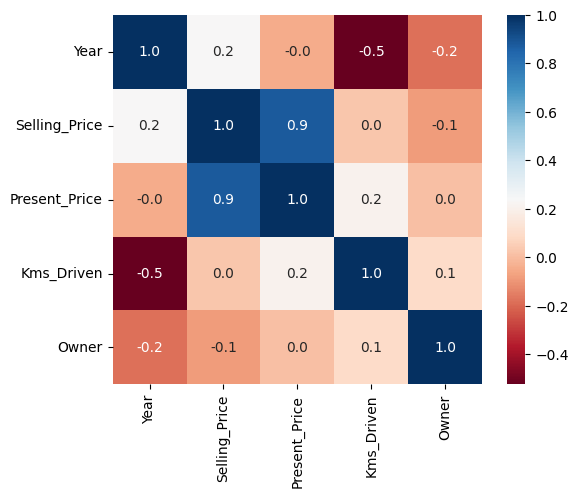

In [12]:
sns.heatmap(correlation, square = True, cbar=True, fmt='.1f',annot=True, cmap='RdBu')

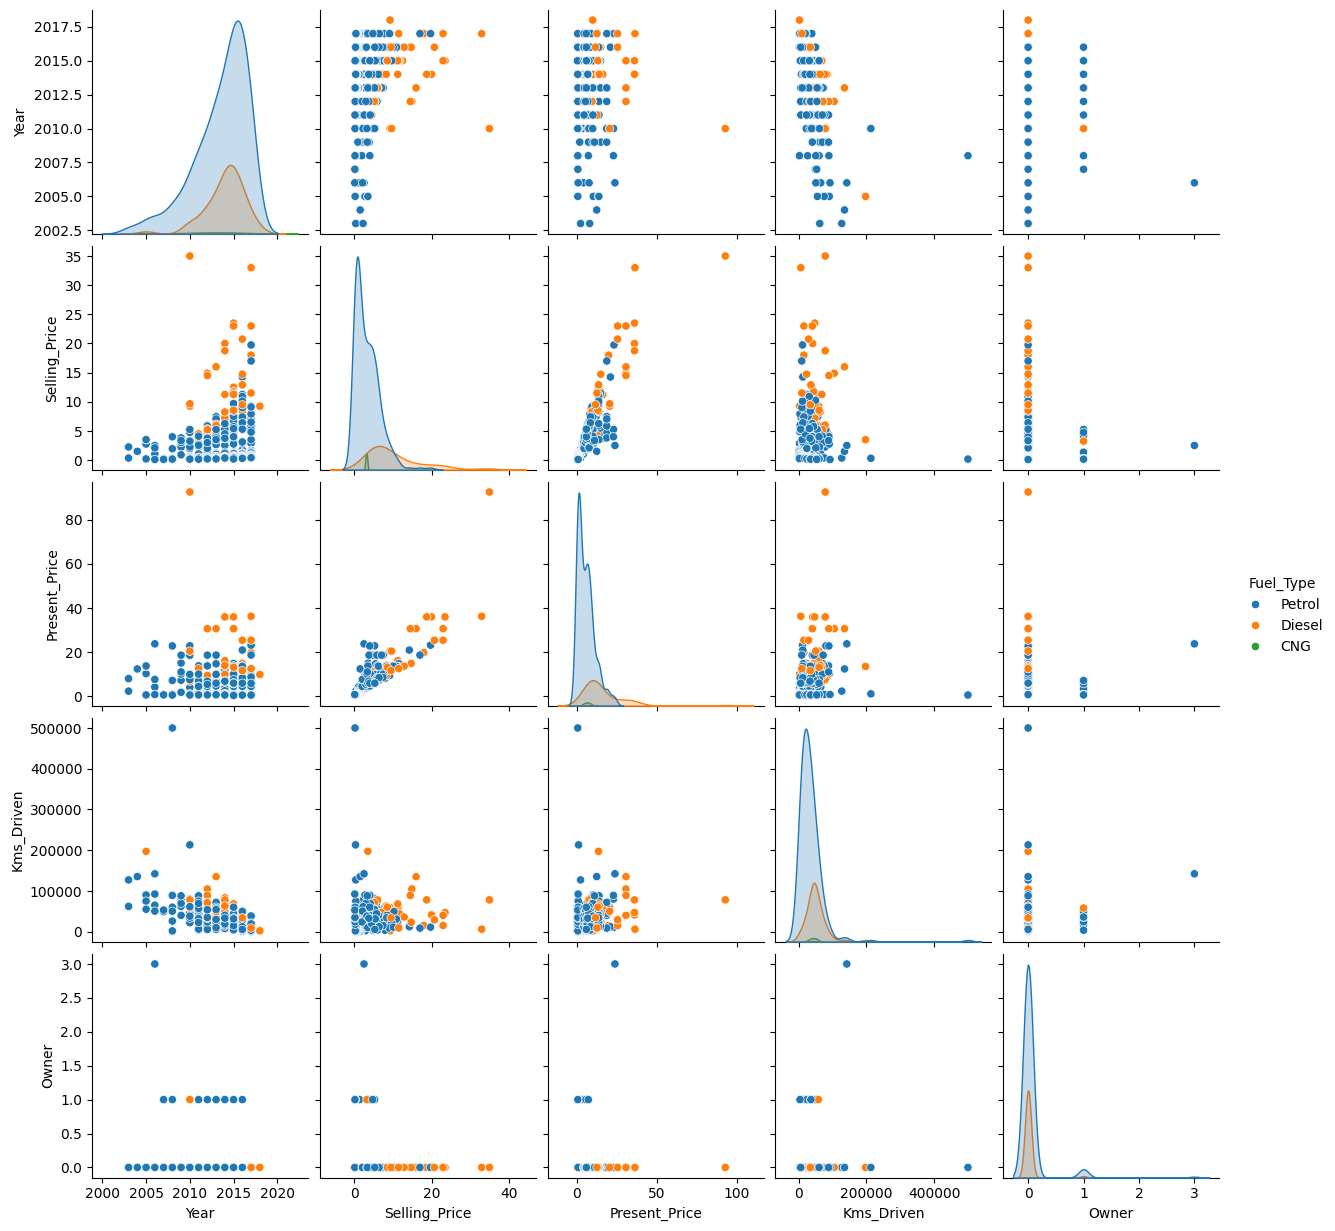

In [13]:
sns.pairplot(car_data, hue = 'Fuel_Type')

# From the graphs we can observe that selling price is mostly related to present price and their scatter plot forms a linear kind of data.

In [22]:
car_data.corr(numeric_only = True)['Selling_Price']

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [15]:
X = new_car_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = new_car_data['Selling_Price']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Creating a common function to use Ridge, Lasso and Elastic Net Regression.

In [17]:
def car_pred(model):
    model.fit(X_train, Y_train)
    train_preds = model.predict(X_train)
    r2_train = metrics.r2_score(Y_train, train_preds)

    model.fit(X_test, Y_test)
    test_preds = model.predict(X_test)
    r2_test = metrics.r2_score(Y_test, test_preds)

    cross_val = cross_val_score(model, X_train, Y_train, cv=5)
    cv_mean = cross_val.mean()
    
    print("r2 score train: ", r2_train)
    print("r2 score test: ", r2_test)
    print("Train CV scores: ", cross_val)
    print("Train CV scores mean: ", cv_mean)

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1, solver = "cholesky")
car_pred(ridge_reg)

r2 score train:  0.8886506066913971
r2 score test:  0.8954329984431731
Train CV scores:  [0.85429918 0.84836309 0.81152413 0.83374248 0.90190796]
Train CV scores mean:  0.8499673656058715


In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
car_pred(lasso_reg)

r2 score train:  0.8765226325385038
r2 score test:  0.885025784800613
Train CV scores:  [0.85026064 0.76883768 0.80331129 0.82891089 0.89967961]
Train CV scores mean:  0.8302000189518134


In [20]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
car_pred(elastic_reg)

r2 score train:  0.8813195996513774
r2 score test:  0.887983035231734
Train CV scores:  [0.85919779 0.79181432 0.80620837 0.83078111 0.90391478]
Train CV scores mean:  0.8383832728023035


# Ridge regressor performs slightly better compared to the other two regressors.